In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
medTeach = pd.read_csv('MT_analysis.csv')
medTeach['health'] = medTeach['health'].astype(str)
medTeach

,health,job,psyt,amsp,cesd,mbi_ex
0,3,False,False,17,34,17
1,4,False,False,22,7,14
2,3,False,False,17,25,24
3,5,True,False,18,17,16
4,4,False,False,21,14,22
...,...,...,...,...,...,...
881,3,False,False,28,41,23
882,3,False,False,21,26,17
883,5,False,False,24,14,15
884,2,False,True,21,33,22


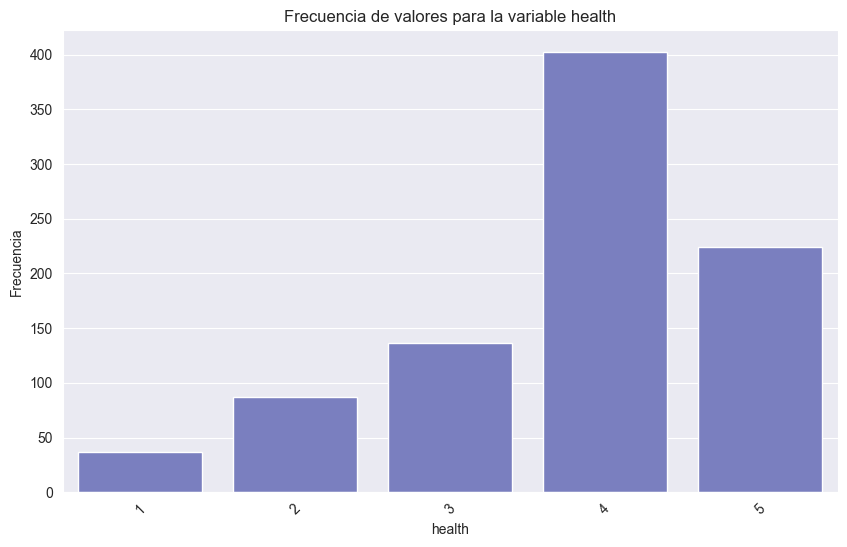

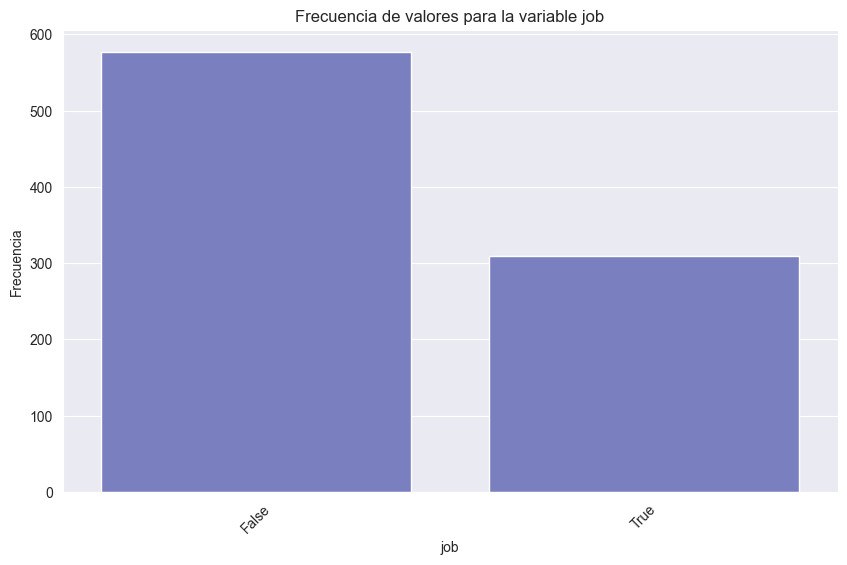

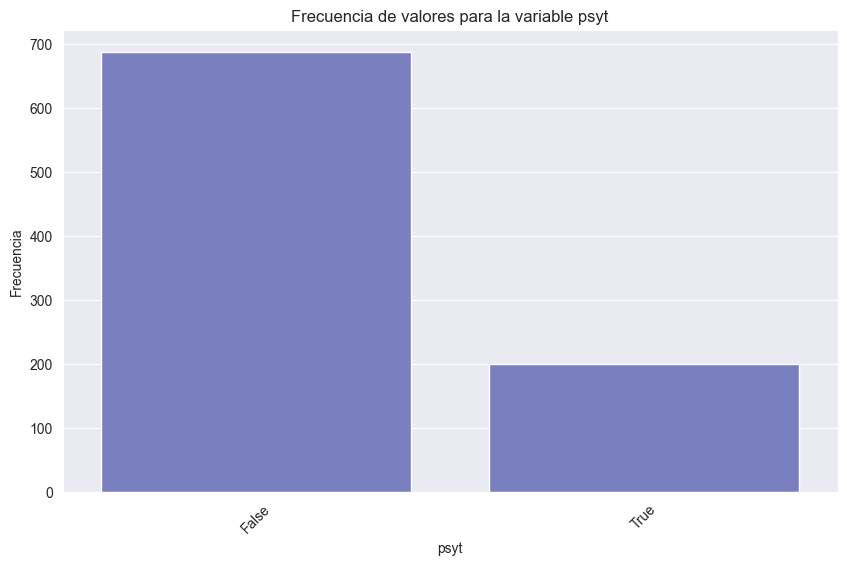

In [92]:
categorical_vars = medTeach.select_dtypes(include=['object', 'bool']).columns

for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=medTeach, x=var, order=medTeach[var].value_counts().index.sort_values(), color='#6E75CA')
    plt.title(f'Frecuencia de valores para la variable {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.show()

In [93]:
medTeach.describe()

,amsp,cesd,mbi_ex
count,886.000000,886.000000,886.000000
mean,23.150113,18.050790,16.878104
std,4.993220,11.478731,5.256025
min,6.000000,0.000000,5.000000
25%,20.000000,9.000000,13.000000
50%,23.000000,16.000000,17.000000
75%,26.750000,25.000000,20.000000
max,35.000000,56.000000,30.000000


In [94]:
medTeach.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   health  886 non-null    object
 1   job     886 non-null    bool  
 2   psyt    886 non-null    bool  
 3   amsp    886 non-null    int64 
 4   cesd    886 non-null    int64 
 5   mbi_ex  886 non-null    int64 
dtypes: bool(2), int64(3), object(1)
memory usage: 29.5+ KB


In [95]:
# stud_h - Tabla de frecuencia
def tabla_frec(df, column:str):
    max_val = df[column].max()
    min_val = df[column].min()
    rango = max_val - min_val
    k = int(1 + 3.322 * np.log10(df[column].count()))
    print(k)
    AK = round(rango / k, 2)
    n = df[column].count()
    tb = pd.DataFrame(columns=['ordinal', 'k', 'mk', 'f', 'f/n', 'F', 'F/n'])
    tb['ordinal'] = range(1, k+1)
    tb['k'] = [f'"["{round(min_val + AK * i, 2)} - {round(min_val + AK * (i+1), 2)}"]"' for i in range(k)]
    tb['mk'] = [(min_val + AK * i + min_val + AK * (i+1)) / 2 for i in range(k)]
    tb['f'] = [((df[column] >= min_val + AK * i) & (df[column] < min_val + AK * (i+1) if i < k-1 else df[column] <= min_val + AK * (i+1))).sum() for i in range(k)]
    tb['f/n'] = round(tb['f'] / n, 3)
    tb['F'] = tb['f'].cumsum()
    tb['F/n'] = round(tb['F'] / n, 3)
    return tb

In [96]:
def histogram_f_fn(df, column:str, b:int):

    # Configurar el estilo del gráfico
    sns.set_style('whitegrid')
    # Crear el histograma y obtener los valores de las barras
    counts, bins, patches = plt.hist(df[column], bins=b, color='#6E75CA')
    # Añadir título y etiquetas a los ejes
    plt.title(f'Histograma de Frecuencia Absoluta de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    # Para cada barra: colocar una etiqueta con el valor de la altura de la barra
    for count, bin, patch in zip(counts, bins, patches):
        plt.text(bin, patch.get_height(), f'{count:.0f}', color='black', ha='left')
    # Mostrar el gráfico
    plt.show()


    # Configurar el estilo del gráfico
    sns.set_style('whitegrid')
    # Crear el histograma de frecuencia relativa y obtener los valores de las barras
    counts, bins, patches = plt.hist(df[column], bins=b, color='#6E75CA', density=True)
    # Añadir título y etiquetas a los ejes
    plt.title(f'Histograma de Frecuencia Relativa de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia Relativa')
    # Para cada barra: colocar una etiqueta con el valor de la altura de la barra
    for count, bin, patch in zip(counts, bins, patches):
        plt.text(bin, patch.get_height(), f'{count:.3f}', color='black', ha='left')
    # Mostrar el gráfico
    plt.show()

In [97]:
def boxplot(value):
    data = medTeach.columns
    column_data = medTeach[data[value]]
    if column_data.dtype in [np.int64, np.float64]:
        sns.set_style("darkgrid")
        fig, ax = plt.subplots(1, 1, figsize=(25, 3))
        sns.boxplot(x=column_data, color='#6E75CA')
        
        # Calculate quartiles and limits
        q1 = column_data.quantile(0.25)
        q2 = column_data.quantile(0.5)
        q3 = column_data.quantile(0.75)
        iqr = q3 - q1
        lower_limit = q1 - 1.5 * iqr
        upper_limit = q3 + 1.5 * iqr
        
        # Add quartile values and limits to the plot
        ax.text(0.05, 0.94, f'Q1: {q1:.2f}', transform=ax.transAxes)
        ax.text(0.05, 0.84, f'Q2: {q2:.2f}', transform=ax.transAxes)
        ax.text(0.05, 0.74, f'Q3: {q3:.2f}', transform=ax.transAxes)
        ax.text(0.05, 0.64, f'Lower Limit: {lower_limit:.2f}', transform=ax.transAxes)
        ax.text(0.05, 0.54, f'Upper Limit: {upper_limit:.2f}', transform=ax.transAxes)
        
        plt.title('Distribución de valores la variable '+data[value])
        plt.xlabel(data[value])        
        plt.show()
        fig.tight_layout()

In [98]:
tabla_frec(medTeach, 'amsp')

10


,ordinal,k,mk,f,f/n,F,F/n
0,1,"""[""6.0 - 8.9""]""",7.45,2,0.002,2,0.002
1,2,"""[""8.9 - 11.8""]""",10.35,9,0.010,11,0.012
2,3,"""[""11.8 - 14.7""]""",13.25,29,0.033,40,0.045
3,4,"""[""14.7 - 17.6""]""",16.15,76,0.086,116,0.131
4,5,"""[""17.6 - 20.5""]""",19.05,130,0.147,246,0.278
5,6,"""[""20.5 - 23.4""]""",21.95,220,0.248,466,0.526
6,7,"""[""23.4 - 26.3""]""",24.85,198,0.223,664,0.749
7,8,"""[""26.3 - 29.2""]""",27.75,126,0.142,790,0.892
8,9,"""[""29.2 - 32.1""]""",30.65,68,0.077,858,0.968
9,10,"""[""32.1 - 35.0""]""",33.55,28,0.032,886,1.000


In [99]:
tabla_frec(medTeach, 'cesd')

10


,ordinal,k,mk,f,f/n,F,F/n
0,1,"""[""0.0 - 5.6""]""",2.8,110,0.124,110,0.124
1,2,"""[""5.6 - 11.2""]""",8.4,191,0.216,301,0.340
2,3,"""[""11.2 - 16.8""]""",14.0,154,0.174,455,0.514
3,4,"""[""16.8 - 22.4""]""",19.6,149,0.168,604,0.682
4,5,"""[""22.4 - 28.0""]""",25.2,100,0.113,704,0.795
5,6,"""[""28.0 - 33.6""]""",30.8,79,0.089,783,0.884
6,7,"""[""33.6 - 39.2""]""",36.4,59,0.067,842,0.950
7,8,"""[""39.2 - 44.8""]""",42.0,21,0.024,863,0.974
8,9,"""[""44.8 - 50.4""]""",47.6,16,0.018,879,0.992
9,10,"""[""50.4 - 56.0""]""",53.2,7,0.008,886,1.000


In [100]:
tabla_frec(medTeach, 'mbi_ex')

10


,ordinal,k,mk,f,f/n,F,F/n
0,1,"""[""5.0 - 7.5""]""",6.25,38,0.043,38,0.043
1,2,"""[""7.5 - 10.0""]""",8.75,24,0.027,62,0.070
2,3,"""[""10.0 - 12.5""]""",11.25,119,0.134,181,0.204
3,4,"""[""12.5 - 15.0""]""",13.75,117,0.132,298,0.336
4,5,"""[""15.0 - 17.5""]""",16.25,206,0.233,504,0.569
5,6,"""[""17.5 - 20.0""]""",18.75,116,0.131,620,0.700
6,7,"""[""20.0 - 22.5""]""",21.25,129,0.146,749,0.845
7,8,"""[""22.5 - 25.0""]""",23.75,55,0.062,804,0.907
8,9,"""[""25.0 - 27.5""]""",26.25,62,0.070,866,0.977
9,10,"""[""27.5 - 30.0""]""",28.75,20,0.023,886,1.000


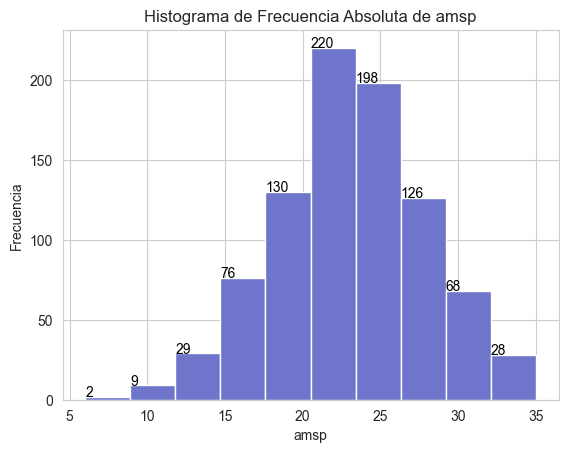

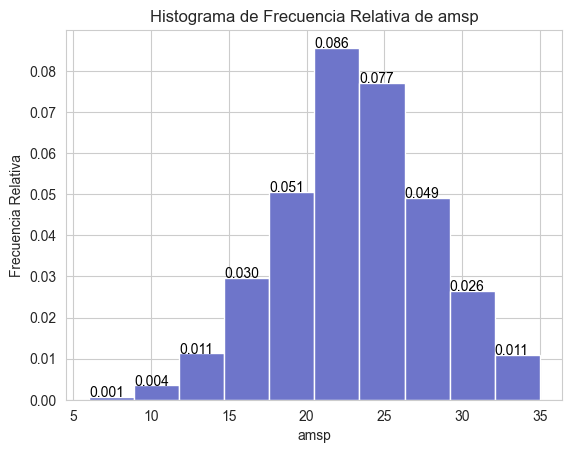

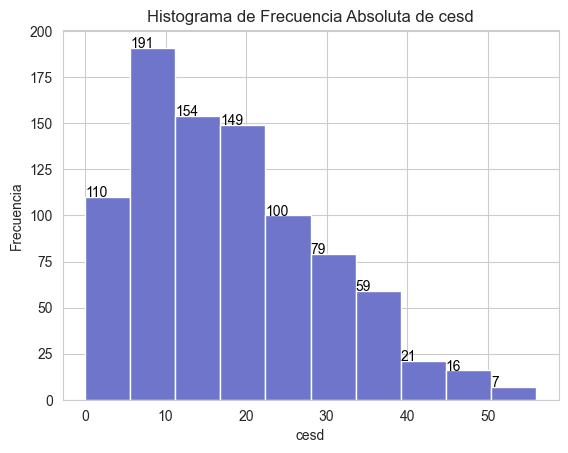

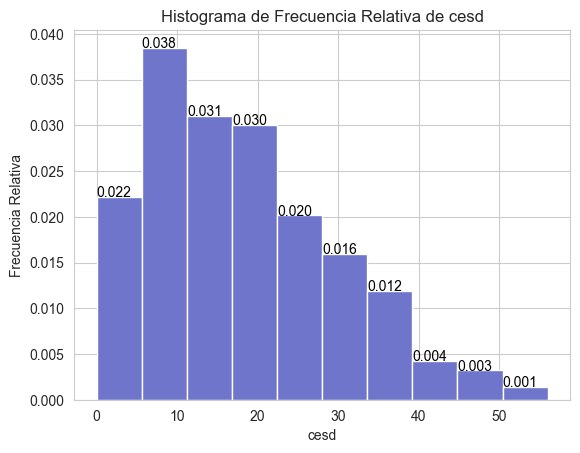

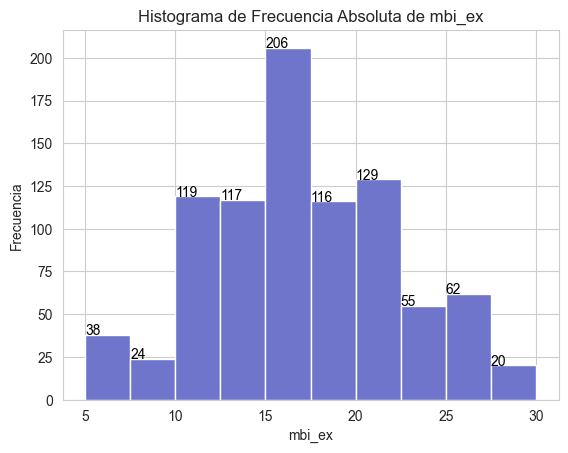

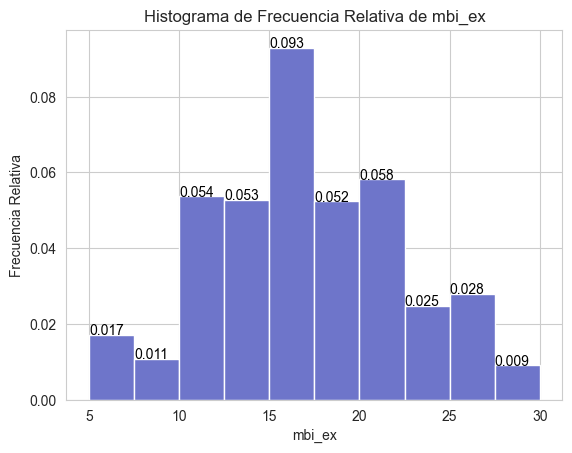

In [101]:
histogram_f_fn(medTeach, "amsp", 10)
histogram_f_fn(medTeach, "cesd", 10)
histogram_f_fn(medTeach, "mbi_ex", 10)


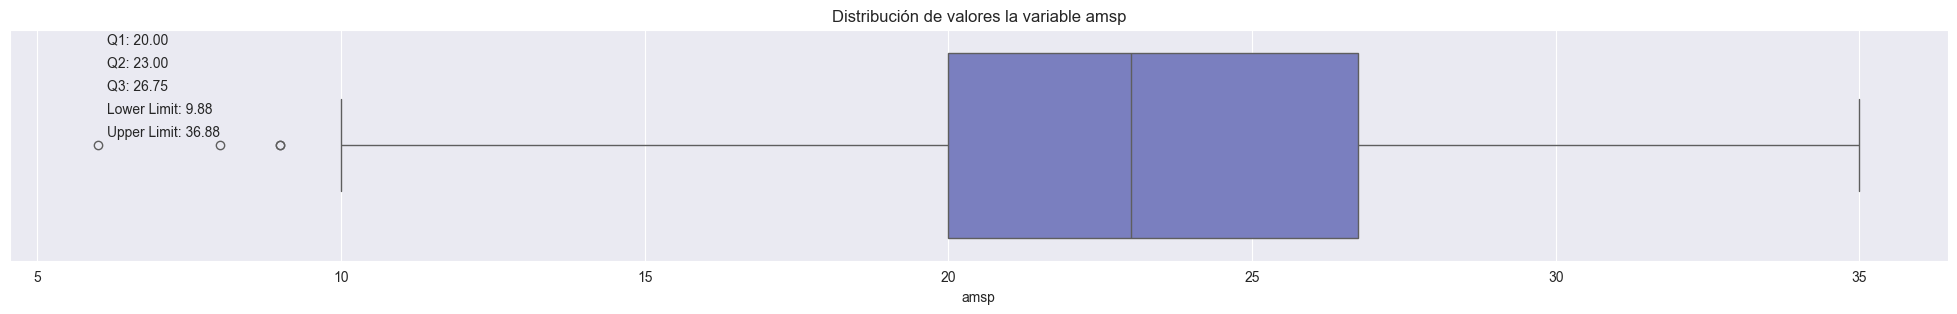

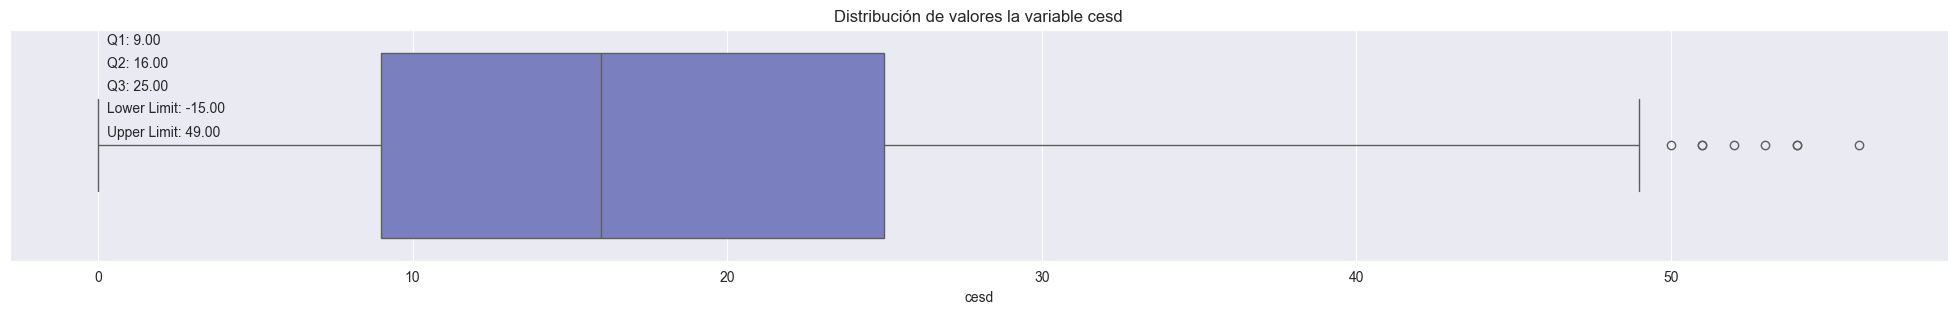

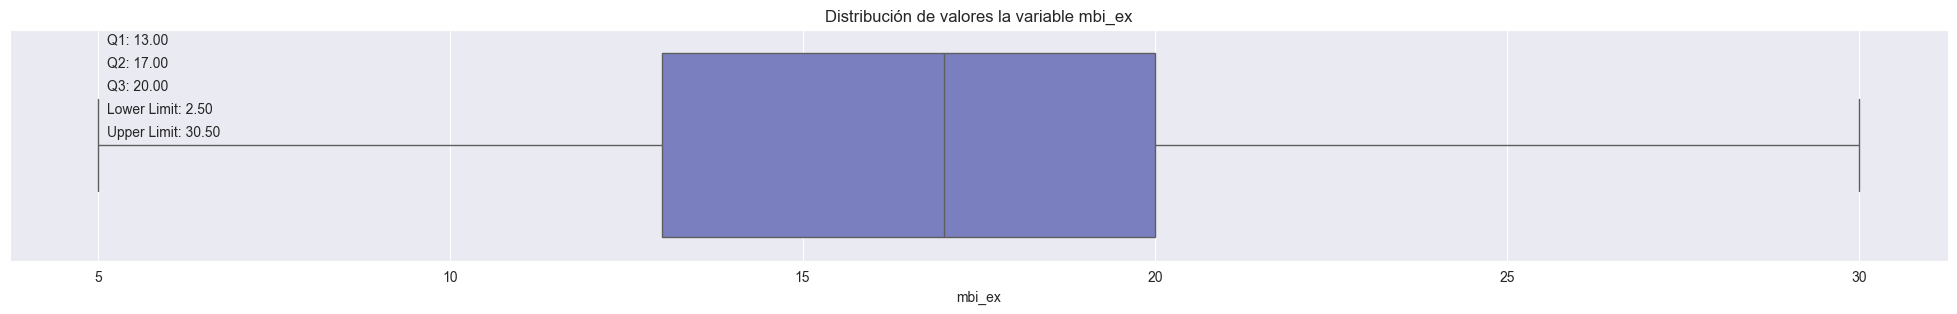

In [102]:
dataTypes=medTeach.dtypes
for i in range(dataTypes.size):
    boxplot(i)

In [103]:
medTeach_numerics = medTeach.select_dtypes(include=[np.number])
medTeach_numerics.corr()

,amsp,cesd,mbi_ex
amsp,1.000000,-0.152052,-0.073011
cesd,-0.152052,1.000000,0.605617
mbi_ex,-0.073011,0.605617,1.000000


<Axes: >

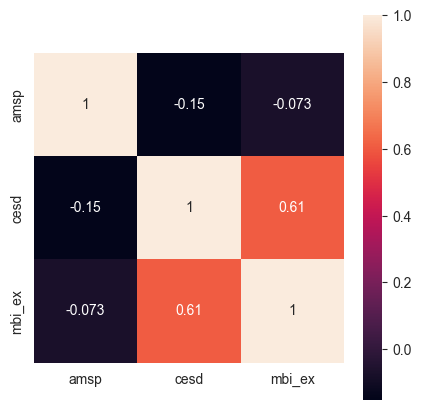

In [104]:
plt.figure(figsize=(5,5))
sns.heatmap(medTeach_numerics.corr(), 
            #cmap = 'coolwarm', 
            annot=True,
            square=True)

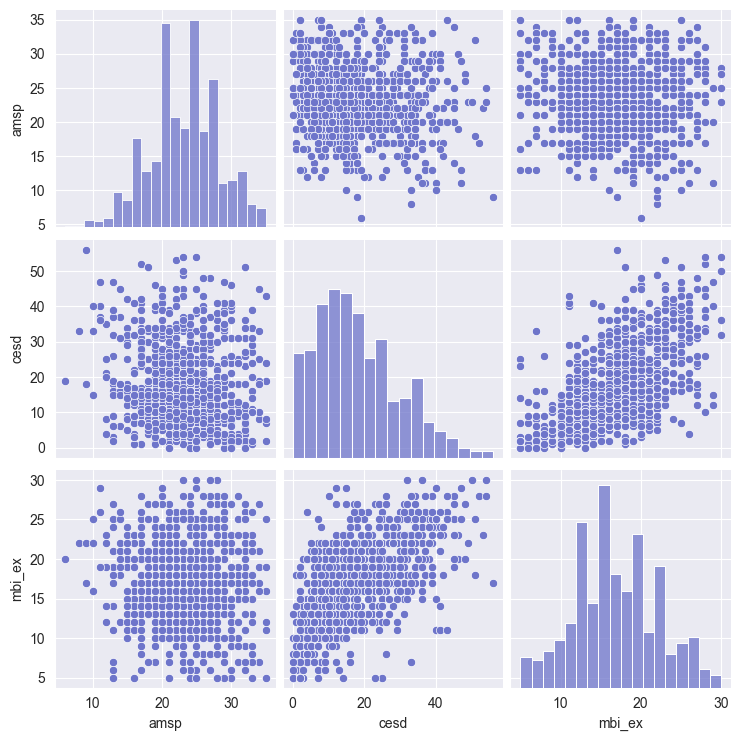

In [155]:
MT = medTeach.select_dtypes(exclude=['object', 'bool']).copy()

sns.pairplot(MT, plot_kws={'color':'#6E75CA'}, diag_kws={'color':'#6E75CA'})

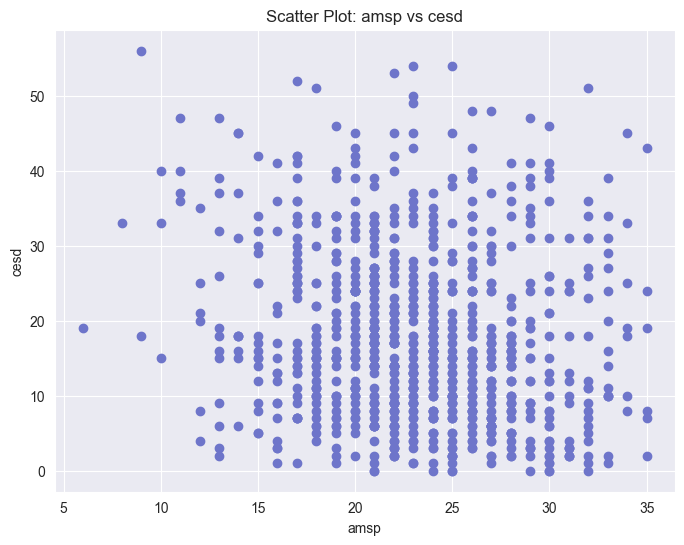

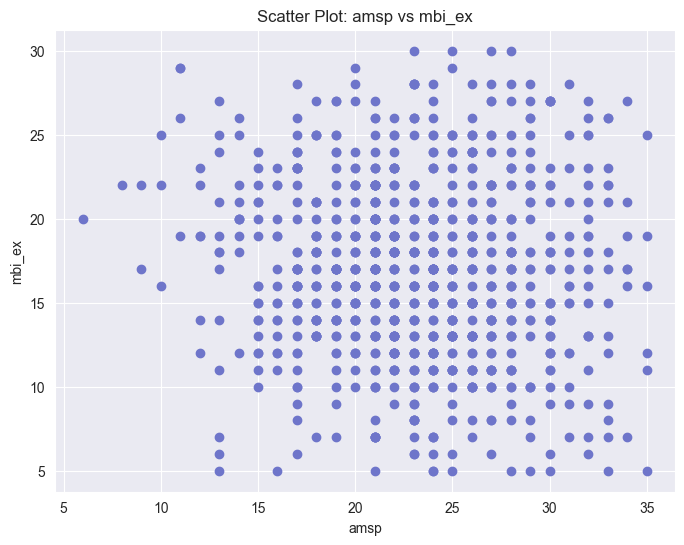

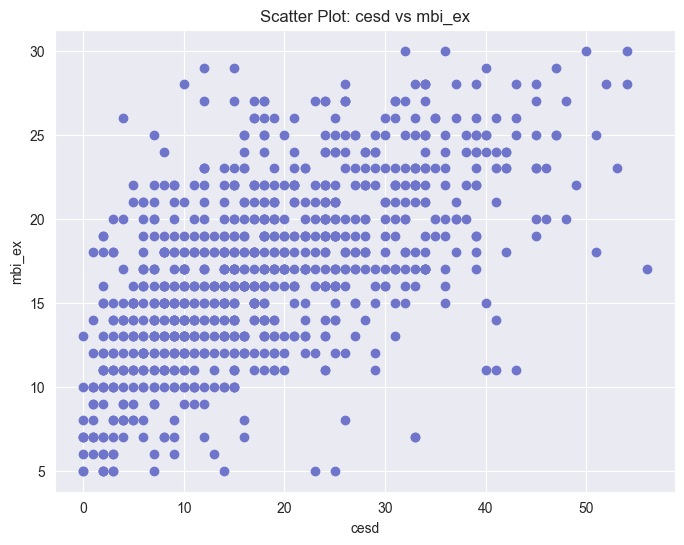

In [188]:
def scatter_plots(df):
    columns = df.columns
    
    for i in range(len(columns)):
        for j in range(i+1, len(columns)):
            x = columns[i]
            y = columns[j]
            
            plt.figure(figsize=(8, 6))
            plt.scatter(df[x], df[y], color='#6E75CA')
            plt.title(f'Scatter Plot: {x} vs {y}')
            plt.xlabel(x)
            plt.ylabel(y)
            plt.show()
scatter_plots(MT)

In [106]:
def generate_contingency_tables(df):
    categorical_vars = [var for var in df.columns if df[var].dtype == 'object' or df[var].dtype == 'bool']
    
    contingency_tables = {}
    
    for i in range(len(categorical_vars)):
        for j in range(i+1, len(categorical_vars)):
            var1 = categorical_vars[i]
            var2 = categorical_vars[j]
            
            if f'{var1} vs {var2}' not in contingency_tables and f'{var2} vs {var1}' not in contingency_tables:
                contingency_table = pd.crosstab(index=df[var1], columns=df[var2], margins=True, margins_name='Total')
                contingency_tables[f'{var1} vs {var2}'] = contingency_table
                # Guardar la tabla de contingencia en un DataFrame separado
                globals()[f'{var1}_vs_{var2}_table'] = contingency_table
        
    return contingency_tables
generate_contingency_tables(medTeach)

{'health vs job': job     False  True  Total
 health                    
 1          24    13     37
 2          48    39     87
 3          94    42    136
 4         267   135    402
 5         144    80    224
 Total     577   309    886,
 'health vs psyt': psyt    False  True  Total
 health                    
 1          30     7     37
 2          54    33     87
 3          94    42    136
 4         316    86    402
 5         193    31    224
 Total     687   199    886,
 'job vs psyt': psyt   False  True  Total
 job                      
 False    458   119    577
 True     229    80    309
 Total    687   199    886}

In [107]:
health_vs_job_table

job,False,True,Total
health,,,
1,24,13,37
2,48,39,87
3,94,42,136
4,267,135,402
5,144,80,224
Total,577,309,886


In [108]:
health_vs_psyt_table

psyt,False,True,Total
health,,,
1,30,7,37
2,54,33,87
3,94,42,136
4,316,86,402
5,193,31,224
Total,687,199,886


In [129]:

def calcular_frecuencia_relativa_total(tabla):
    print("Tabla de frecuencia relativa total")
    total = tabla.loc['Total', 'Total']
    tabla_frec_relativa = round(tabla / total, 3)
    return tabla_frec_relativa

def calcular_frecuencia_relativa_total_columnas(tabla):
    print("Tabla de frecuencia relativa total por columnas")
    total_columnas = tabla.iloc[-1, :-1]
    tabla_frec_relativa = tabla.iloc[:-1, :-1].div(total_columnas, axis=1).round(3)
    return tabla_frec_relativa

def calcular_frecuencia_relativa_total_filas(tabla):
    print("Tabla de frecuencia relativa total por filas")
    total_filas = tabla.iloc[:-1, -1]
    tabla_frec_relativa = tabla.iloc[:-1, :-1].div(total_filas, axis=0).round(3)
    return tabla_frec_relativa


In [120]:
calcular_frecuencia_relativa_total(health_vs_psyt_table)

psyt,False,True,Total
health,,,
1,0.034,0.008,0.042
2,0.061,0.037,0.098
3,0.106,0.047,0.153
4,0.357,0.097,0.454
5,0.218,0.035,0.253
Total,0.775,0.225,1.000


In [121]:
calcular_frecuencia_relativa_total(health_vs_job_table)


job,False,True,Total
health,,,
1,0.027,0.015,0.042
2,0.054,0.044,0.098
3,0.106,0.047,0.153
4,0.301,0.152,0.454
5,0.163,0.090,0.253
Total,0.651,0.349,1.000


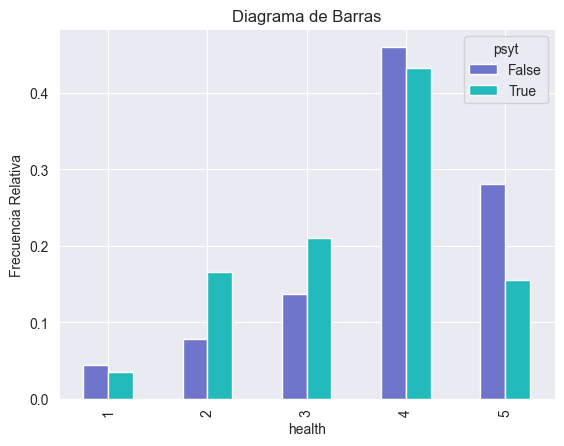

psyt,False,True
health,,
1,0.044,0.035
2,0.079,0.166
3,0.137,0.211
4,0.460,0.432
5,0.281,0.156


In [174]:
health_psyt_RC=calcular_frecuencia_relativa_total_columnas(health_vs_psyt_table)
health_psyt_RC.plot.bar(color=['#6E75CA', '#22BABB'])
plt.title('Diagrama de Barras')
plt.xlabel('health')
plt.ylabel('Frecuencia Relativa')
plt.show()

health_psyt_RC

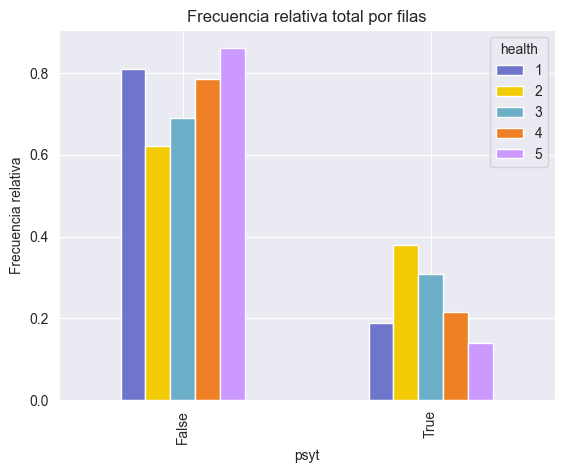

psyt,False,True
health,,
1,0.811,0.189
2,0.621,0.379
3,0.691,0.309
4,0.786,0.214
5,0.862,0.138


In [170]:
health_psyt_RF=calcular_frecuencia_relativa_total_filas(health_vs_psyt_table)
# Crear el gráfico de barras
# Transponer el DataFrame
health_psyt_RF_T = health_psyt_RF.T

health_psyt_RF_T.plot.bar(color=['#6E75CA', '#F2CB05', '#6DAFC9', '#EF8026', '#CC99FF'])

# Añadir título y etiquetas a los ejes
plt.title('Frecuencia relativa total por filas')
plt.xlabel('psyt')
plt.ylabel('Frecuencia relativa')

# Mostrar el gráfico
plt.show()
health_psyt_RF

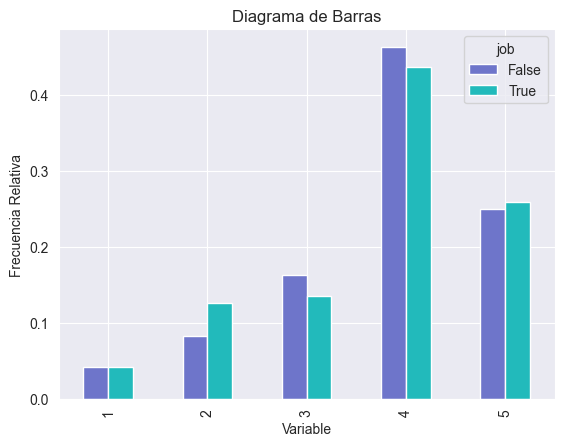

job,False,True
health,,
1,0.042,0.042
2,0.083,0.126
3,0.163,0.136
4,0.463,0.437
5,0.250,0.259


In [173]:
health_job_RC=calcular_frecuencia_relativa_total_columnas(health_vs_job_table)
health_job_RC.plot.bar(color=['#6E75CA', '#22BABB'])
plt.title('Diagrama de Barras')
plt.xlabel('Variable')
plt.ylabel('Frecuencia Relativa')
plt.show()
health_job_RC

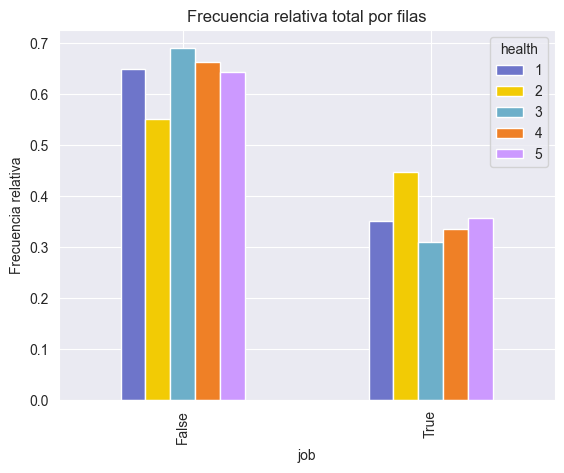

job,False,True
health,,
1,0.649,0.351
2,0.552,0.448
3,0.691,0.309
4,0.664,0.336
5,0.643,0.357


In [177]:
health_job_RF= calcular_frecuencia_relativa_total_filas(health_vs_job_table)
# Crear el gráfico de barras
# Transponer el DataFrame
health_job_RF_T = health_job_RF.T

health_job_RF_T.plot.bar(color=['#6E75CA', '#F2CB05', '#6DAFC9', '#EF8026', '#CC99FF'])

# Añadir título y etiquetas a los ejes
plt.title('Frecuencia relativa total por filas')
plt.xlabel('job')
plt.ylabel('Frecuencia relativa')

# Mostrar el gráfico
plt.show()
health_job_RF

C:\Users\HOME\AppData\Local\Temp\ipykernel_4088\3291919160.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=medTeach, x='health', y='cesd', palette=['#6E75CA', '#F2CB05', '#6DAFC9', '#EF8026', '#CC99FF'])


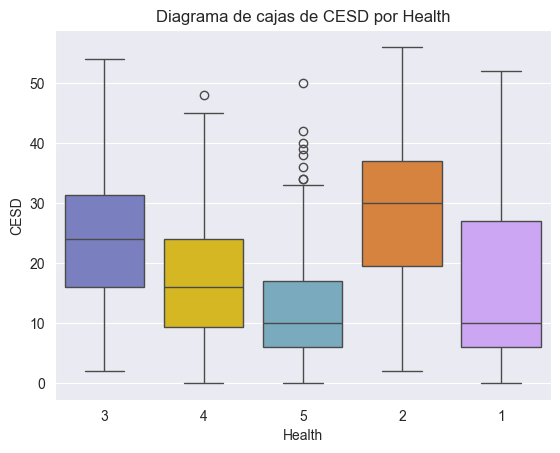

In [185]:
sns.boxplot(data=medTeach, x='health', y='cesd', palette=['#6E75CA', '#F2CB05', '#6DAFC9', '#EF8026', '#CC99FF'])
plt.title('Diagrama de cajas de CESD por Health')
plt.xlabel('Health')
plt.ylabel('CESD')
plt.show()


C:\Users\HOME\AppData\Local\Temp\ipykernel_4088\2924480586.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=medTeach, x='health', y='amsp', palette=['#6E75CA', '#F2CB05', '#6DAFC9', '#EF8026', '#CC99FF'])


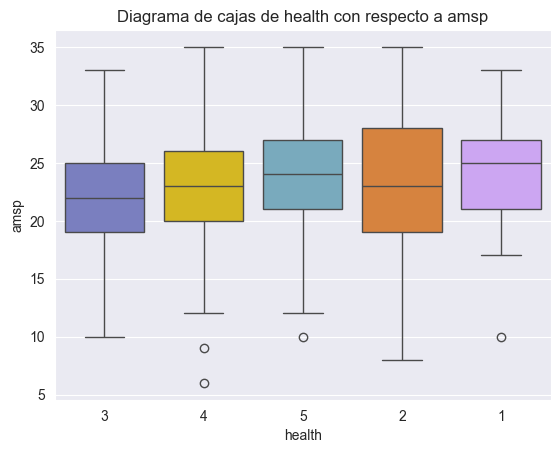

In [187]:
sns.boxplot(data=medTeach, x='health', y='amsp', palette=['#6E75CA', '#F2CB05', '#6DAFC9', '#EF8026', '#CC99FF'])
plt.title('Diagrama de cajas de health con respecto a amsp')
plt.xlabel('health')
plt.ylabel('amsp')
plt.show()
